In [1]:
%matplotlib inline


# Partial Dependence Plots


Partial dependence plots show the dependence between the target function [2]_
and a set of 'target' features, marginalizing over the
values of all other features (the complement features). Due to the limits
of human perception the size of the target feature set must be small (usually,
one or two) thus the target features are usually chosen among the most
important features
(see :attr:`~sklearn.ensemble.GradientBoostingRegressor.feature_importances_`).

This example shows how to obtain partial dependence plots from a
:class:`~sklearn.ensemble.GradientBoostingRegressor` trained on the California
housing dataset. The example is taken from [1]_.

The plot shows four one-way and one two-way partial dependence plots.
The target variables for the one-way PDP are:
median income (`MedInc`), avg. occupants per household (`AvgOccup`),
median house age (`HouseAge`), and avg. rooms per household (`AveRooms`).

We can clearly see that the median house price shows a linear relationship
with the median income (top left) and that the house price drops when the
avg. occupants per household increases (top middle).
The top right plot shows that the house age in a district does not have
a strong influence on the (median) house price; so does the average rooms
per household.
The tick marks on the x-axis represent the deciles of the feature values
in the training data.

Partial dependence plots with two target features enable us to visualize
interactions among them. The two-way partial dependence plot shows the
dependence of median house price on joint values of house age and avg.
occupants per household. We can clearly see an interaction between the
two features:
For an avg. occupancy greater than two, the house price is nearly independent
of the house age, whereas for values less than two there is a strong dependence
on age.

.. [1] T. Hastie, R. Tibshirani and J. Friedman,
    "Elements of Statistical Learning Ed. 2", Springer, 2009.

.. [2] For classification you can think of it as the regression score before
       the link function.


Automatically created module for IPython interactive environment
downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to /Users/timwhite/scikit_learn_data
Training GBRT...
 done.
Convenience plot with ``partial_dependence_plots``
Custom 3d plot via ``partial_dependence``


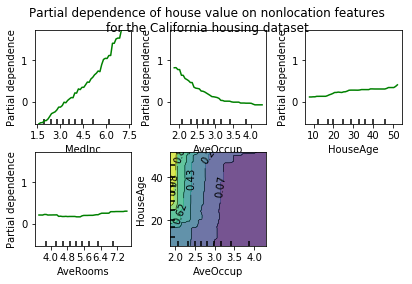

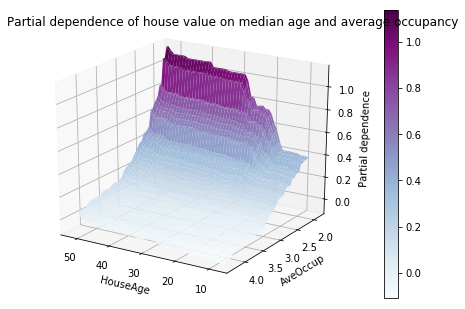

In [2]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing


def main():
    cal_housing = fetch_california_housing()

    # split 80/20 train-test
    X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                        cal_housing.target,
                                                        test_size=0.2,
                                                        random_state=1)
    names = cal_housing.feature_names

    print("Training GBRT...")
    clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
    clf.fit(X_train, y_train)
    print(" done.")

    print('Convenience plot with ``partial_dependence_plots``')

    features = [0, 5, 1, 2, (5, 1)]
    fig, axs = plot_partial_dependence(clf, X_train, features,
                                       feature_names=names,
                                       n_jobs=3, grid_resolution=50)
    fig.suptitle('Partial dependence of house value on nonlocation features\n'
                 'for the California housing dataset')
    plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

    print('Custom 3d plot via ``partial_dependence``')
    fig = plt.figure()

    target_feature = (1, 5)
    pdp, axes = partial_dependence(clf, target_feature,
                                   X=X_train, grid_resolution=50)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].reshape(list(map(np.size, axes))).T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
    ax.set_xlabel(names[target_feature[0]])
    ax.set_ylabel(names[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of house value on median age and '
                 'average occupancy')
    plt.subplots_adjust(top=0.9)

    plt.show()


# Needed on Windows because plot_partial_dependence uses multiprocessing
if __name__ == '__main__':
    main()